In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.external.tifffile import imsave
from skimage.filters import gaussian
from Settings import load_settings

# dataset_name = 'TIAM_protrusion'
# dataset_name = 'TIAM_protrusion_full'
# dataset_name = 'FRET_sensors + actinHistamineExpt1_forPRES'
# dataset_name = 'FRET_sensors + actinPDGFExpt2_forPRES'
# dataset_name = 'Rac1_arhgap31_01_s2_forPRES'
dataset_name = 'Rac1_arhgap31_02_s2_forPRES'

data, param = load_settings(dataset_name)

# x = data.load_frame_morpho(0)
# y = gaussian(x, sigma=5, preserve_range=True)
# imsave('gaussian.tif', y.astype(np.float32), compress=6)
# imsave('thresholded.tif', (145<y).astype(np.uint8), compress=6)

In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
def normalize(x):
    xmax = np.max(x)
    xmin = np.min(x)
    return (x-xmin)/(xmax-xmin)

In [34]:
# Small class allowing to manually interact with the plot

import ipywidgets as ipw
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output
%matplotlib notebook
from Segmentation import segment_aux

class Morphointeract:
    
    def __init__(self, data):
        
        style = {'description_width': 'initial'}
        layout = {'width': '300px'}
                
        # Time
        self.time = ipw.IntSlider(description = 'Time', min = 0, max = data.K-1, continuous_update=False)
        self.time.observe(self.update_time, names = 'value')
        
        # Threshold
        self.threshold = ipw.FloatSlider(description='Threshold', min = 50, max = 2000, step = 0.1, value = 155)
        # self.threshold = ipw.FloatSlider(description='Threshold', min = 0, max = 5, step = 0.01, value = 1)
        self.threshold.observe(self.update_threshold, names = 'value')
        
        # Filter size
        self.sigma = ipw.FloatSlider(description='Filter size', min = 0, max = 10, step = 0.1, value = param.sigma)
        self.sigma.observe(self.update_sigma, names = 'value')
        
        # Transparency
        self.transparency = ipw.FloatSlider(description='Transparency', min = 0, max = 1, step = 0.1, value = 1)
        self.transparency.observe(self.update_alpha, names = 'value')
        
        # create output widget containing plots
#       self.out = ipw.Output()
#       with self.out:
        self.out_errors = ipw.Output()
        self.fig = plt.figure(1, figsize=(8,9/2))
        x = data.load_frame_morpho(self.time.value)
        y = segment_aux(x, 2, self.threshold.value)
        self.im = plt.imshow(np.stack((self.transparency.value*y.astype(np.float), normalize(x), np.zeros(x.shape)), axis=2))
                
    def connect(self):
        '''Connect mouse click and key press to events'''

    def update_time(self, change):
        # self.time = change['new']
        self.update_plot()
        
    def update_threshold(self, change):
        # self.threshold = change['new']
        self.update_plot()
        
    def update_sigma(self, change):
        # self.threshold = change['new']
        self.update_plot()
        
    def update_alpha(self, change):
        # self.transparency = change['new']
        self.update_plot()
    
    def update_plot(self):
        '''Update plot data upon change of time or channel'''
        with self.out_errors:
            x = data.load_frame_morpho(self.time.value)
            y = segment_aux(x, self.sigma.value, self.threshold.value)
            # y = segment_aux(x, self.sigma.value, self.threshold.value*param.Tfun(self.time.value))
            # y = segment_aux(x, self.sigma.value, self.threshold.value*np.mean(x)/165)
            self.im.set_data(np.stack((self.transparency.value*y.astype(np.float), normalize(x), np.zeros(x.shape)), axis=2))
  

<IPython.core.display.Javascript object>


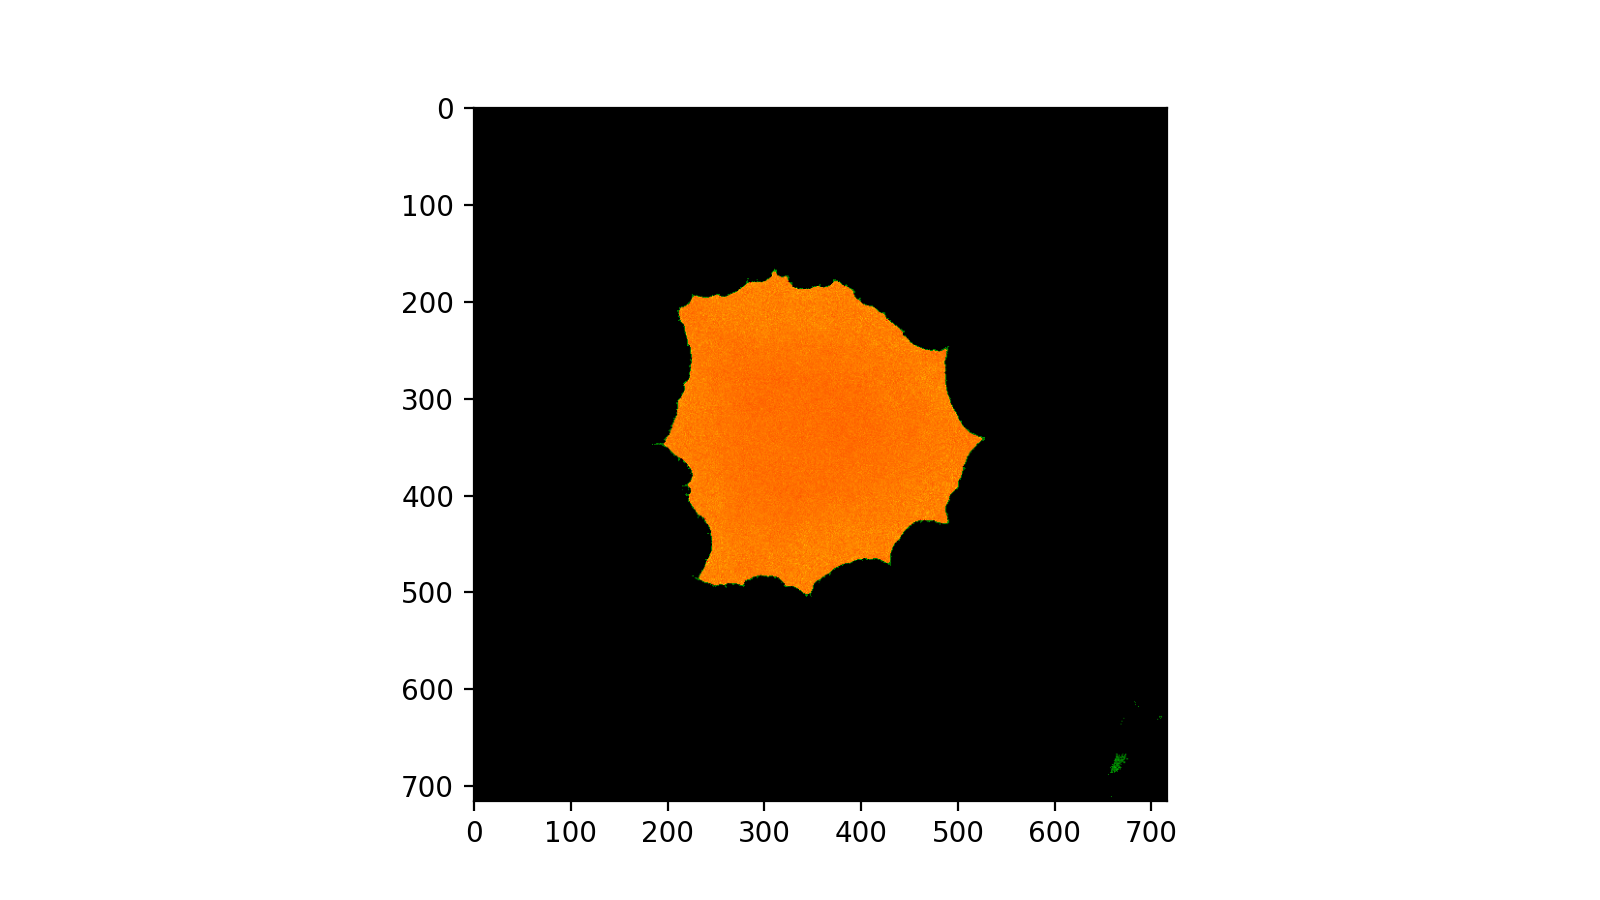

IntSlider(value=0, continuous_update=False, description='Time', max=299)

FloatSlider(value=1.0, description='Transparency', max=1.0)

FloatSlider(value=2.0, description='Filter size', max=10.0)

FloatSlider(value=155.0, description='Threshold', max=2000.0, min=50.0)

<IPython.core.display.Javascript object>


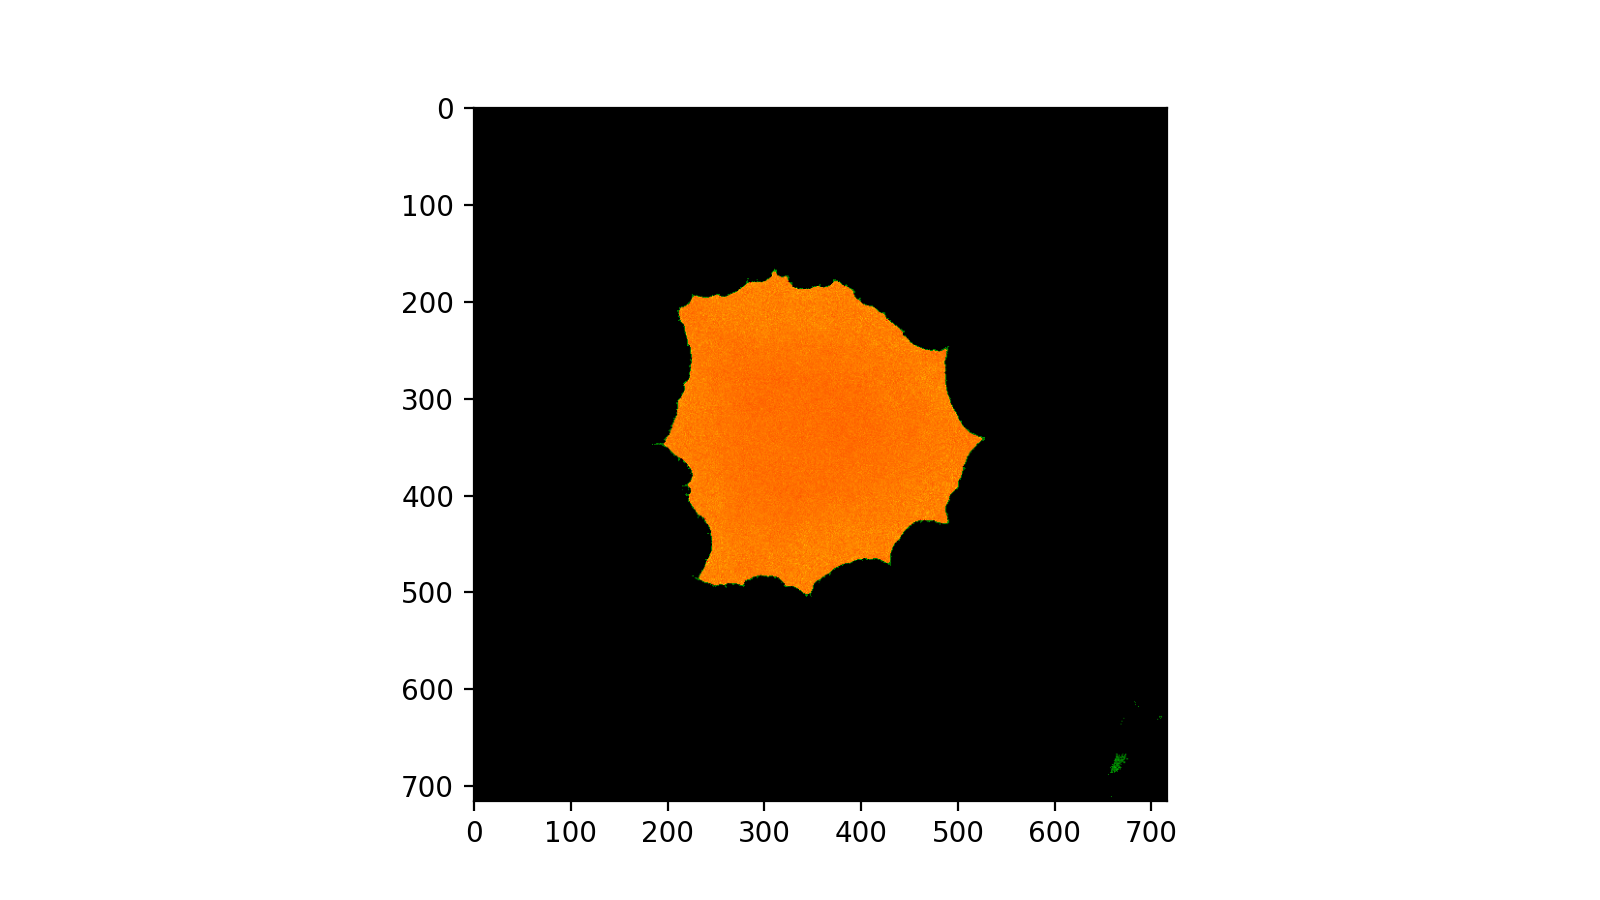

In [35]:
mi = Morphointeract(data)
mi.connect()

#clear_output(wait=True)
#ipw.VBox([mi.time_slider,ipw.HBox([mi.out, mi.channel])])
display(mi.time, mi.transparency, mi.sigma, mi.threshold, mi.fig)

In [8]:
import dill
res = dill.load(open(r"C:\Work\UniBE2\Results\36 Windowing bug corrected - Bad frames removed - Shared with Kobus\Output\TIAM_protrusion\Results.pkl", "rb"))

<IPython.core.display.Javascript object>


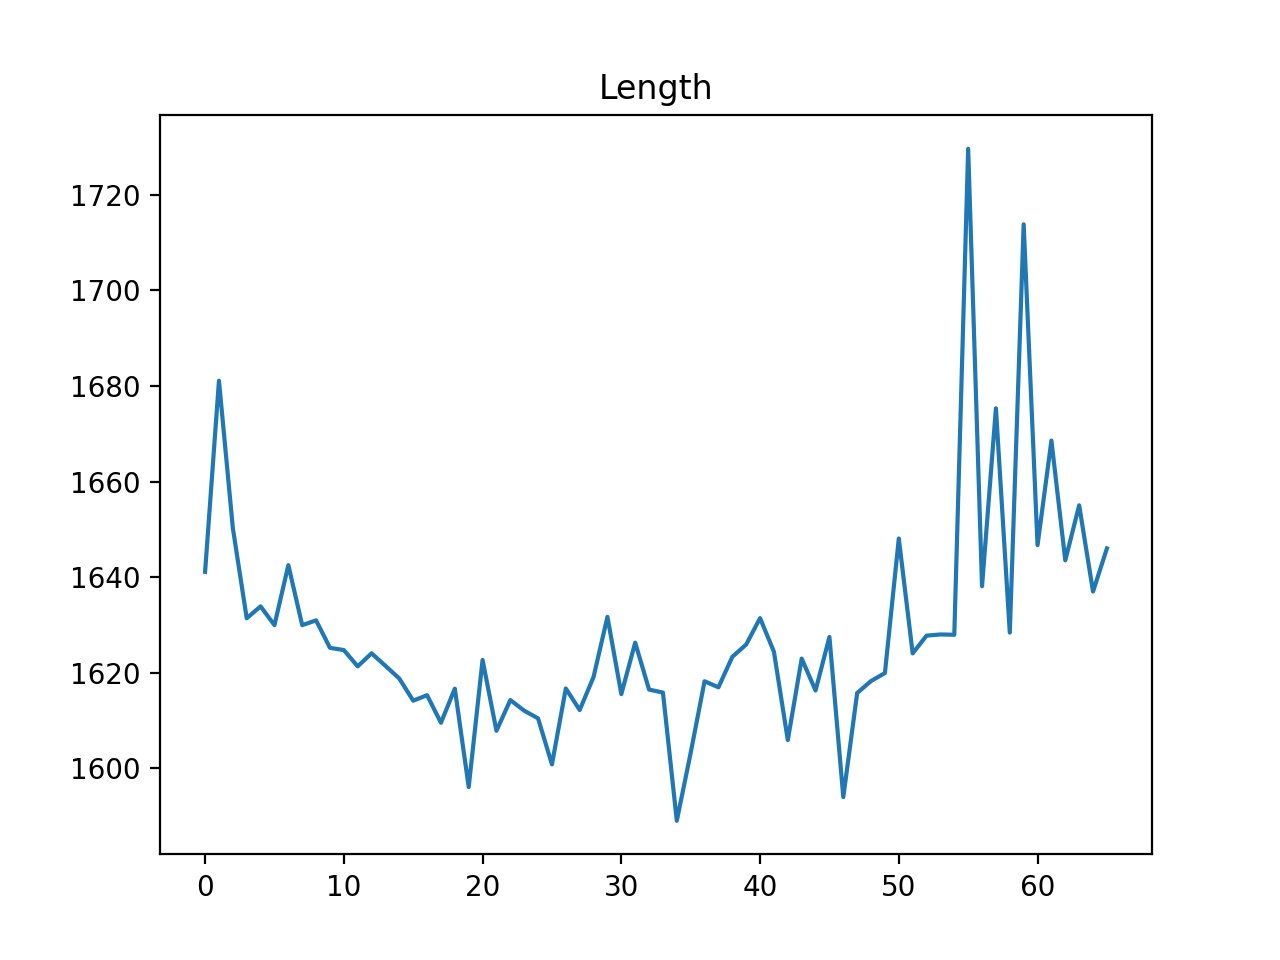

<IPython.core.display.Javascript object>


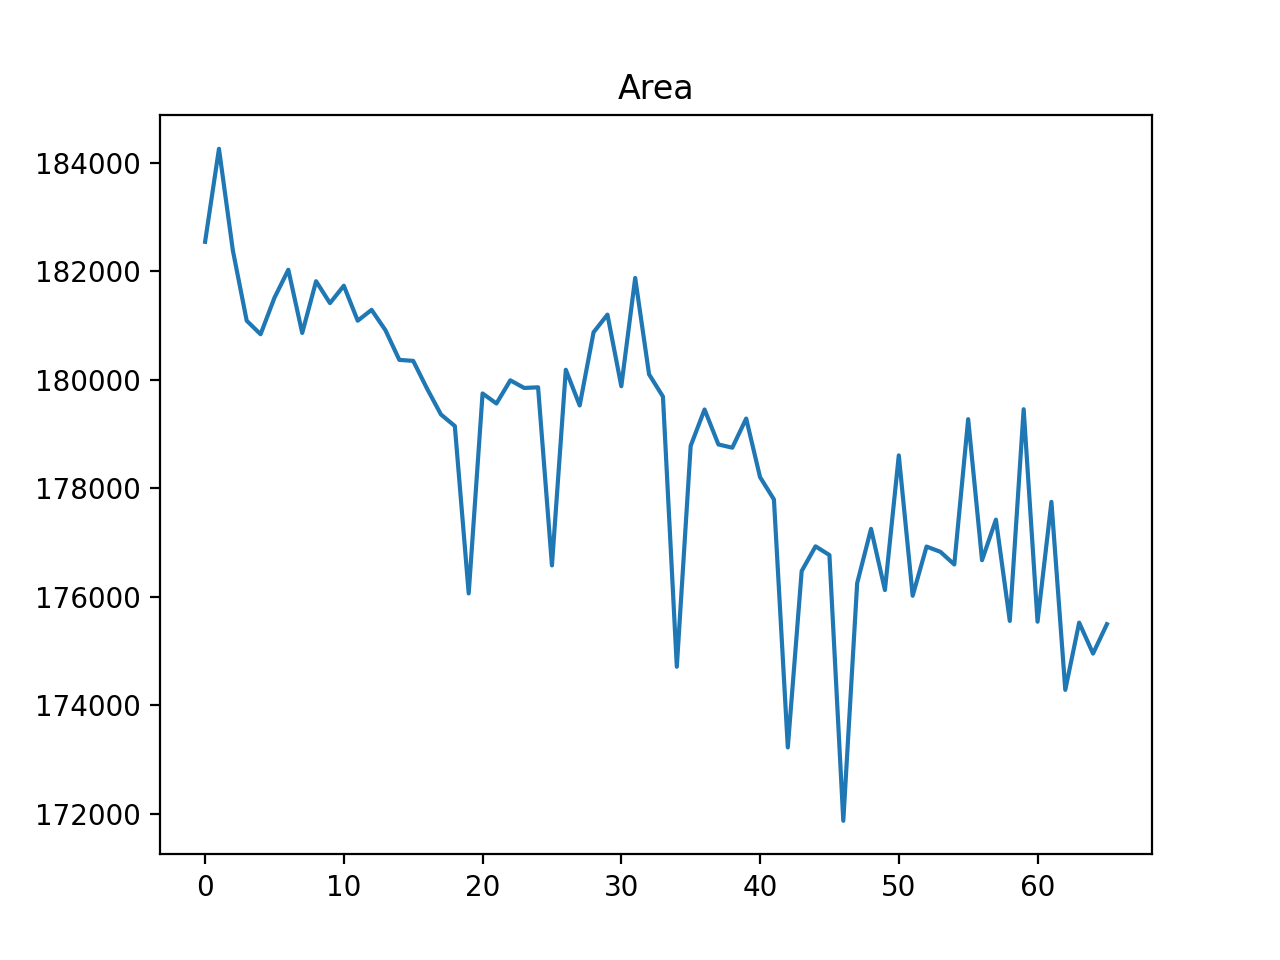

<IPython.core.display.Javascript object>


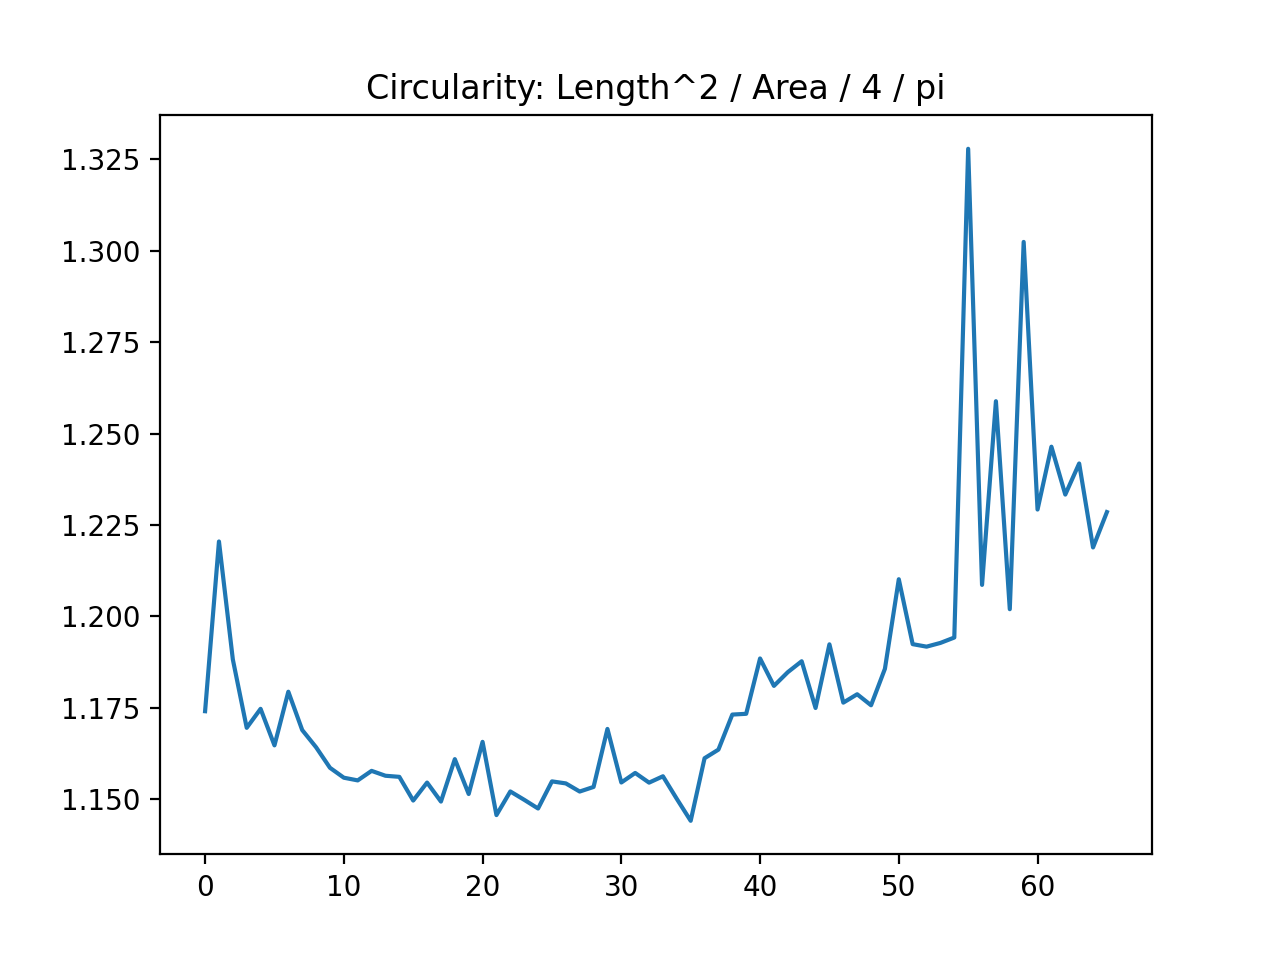

In [13]:
import math

plt.figure()
plt.plot(res.length)
plt.gca().set_title('Length')

plt.figure().gca().set_title('Area')
plt.plot(res.area)

plt.figure().gca().set_title('Circularity: Length^2 / Area / 4 / pi')
plt.plot(res.length**2 / res.area / 4 / math.pi)